![](https://www.kaggle.com/static/images/site-logo.png)

# AUTHOR BY: NAJEEB ULLAH 
# DATE: 2024-03-24


Profile link Github:[Najeeb ullah](https://github.com/najeebjony)


# Logistic Regression 

## Introduction
`Logistic regression` is a `classification` algorithm used to assing observation to a discrete set classes. unlike linear regression 
which output continuous number value  

Logistic regression predicts the probability of an outcome that can only have two values (i.e. a dichotomy). The prediction is based on the use of one or several predictors (numerical and categorical). A linear regression is not appropriate for predicting the value of a binary variable for two reasons:

Logistic regression can be used for:

-   Binary classification 
-   Multi-class classification 
-   One-vs-Rest classification 
## Logistic Regression Assumptions

1. The dependent variable must be categorical in nature.
2. The independent variable (Feature) must be independent
3. There should be no outlier in the data. check for outliers
4. There should be no highly correlation among the independent variable.This can be checked using a correlation matrix.


## import libraries 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score, precision_score , f1_score ,confusion_matrix ,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder, MinMaxScaler

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset  
df = pd.read_csv('clean_pred.csv')
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,Family,IsAlone
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,18-40,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,41-76,2,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,41-76,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,18-40,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,18-40,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
 11  age_group    418 non-null    object 
 12  Family       418 non-null    int64  
 13  IsAlone      418 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 45.8+ KB


In [4]:
# check missing values 
print(df.isnull().sum().sort_index(ascending=False))




age_group      0
Ticket         0
Survived       0
SibSp          0
Sex            0
Pclass         0
PassengerId    0
Parch          0
Name           0
IsAlone        0
Fare           0
Family         0
Embarked       0
Age            0
dtype: int64


# MinMax Scaler

In [5]:
# # One-hot encode categorical columns
# df_encoded = pd.get_dummies(df)

# # Apply MinMaxScaler to the encoded dataframe
# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df_encoded)
# df = pd.DataFrame(df_scaled, columns=df_encoded.columns)


# LabelEncoder

In [6]:
for col in df.columns:
    if df[col].dtype == 'object'or df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

df.head(20)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,Family,IsAlone
0,892,0,3,206,1,34.50000,0,0,152,7.8292,1,3,1,1
1,893,1,3,403,0,47.00000,1,0,221,7.0000,2,4,2,0
2,894,0,2,269,1,62.00000,0,0,73,9.6875,1,4,1,1
3,895,0,3,408,1,27.00000,0,0,147,8.6625,2,3,1,1
4,896,1,3,178,0,22.00000,1,1,138,12.2875,2,3,3,0
5,897,0,3,366,1,14.00000,0,0,261,9.2250,2,1,1,1
6,898,1,3,84,0,30.00000,0,0,158,7.6292,1,3,1,1
7,899,0,2,57,1,26.00000,1,1,84,29.0000,2,3,3,0
8,900,1,3,4,0,18.00000,0,0,100,7.2292,0,2,1,1
9,901,0,3,103,1,21.00000,2,0,269,24.1500,2,3,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    int32  
 4   Sex          418 non-null    int32  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    int32  
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    int32  
 11  age_group    418 non-null    int32  
 12  Family       418 non-null    int64  
 13  IsAlone      418 non-null    int64  
dtypes: float64(2), int32(5), int64(7)
memory usage: 37.7 KB


# X and y columns 

In [8]:
# X and y columns 
X = df.drop('Survived' , axis = 1)
y = df['Survived']

In [9]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,Family,IsAlone
0,892,3,206,1,34.5,0,0,152,7.8292,1,3,1,1
1,893,3,403,0,47.0,1,0,221,7.0000,2,4,2,0
2,894,2,269,1,62.0,0,0,73,9.6875,1,4,1,1
3,895,3,408,1,27.0,0,0,147,8.6625,2,3,1,1
4,896,3,178,0,22.0,1,1,138,12.2875,2,3,3,0


In [10]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

# train test split the data 

In [11]:
# train test split the data 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

# call model 

In [12]:

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Predict The Values

In [13]:
# predict the values
y_pred = model.predict(X_test)

# Evaluate the model 

In [14]:
# evaluate the model 
print('Accuracy score :',accuracy_score(y_test , y_pred))
print('Recall score :',recall_score(y_test , y_pred))
print('Precision score :',precision_score(y_test , y_pred))
print('F1 score :',f1_score(y_test , y_pred))
print('Confusion matrix:',confusion_matrix(y_test , y_pred))
print('Classification report:',classification_report(y_test , y_pred))

Accuracy score : 1.0
Recall score : 1.0
Precision score : 1.0
F1 score : 1.0
Confusion matrix: [[50  0]
 [ 0 34]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# plot the confusion the Metrix

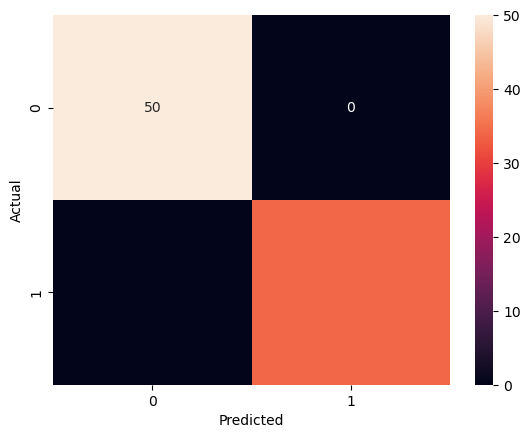

In [15]:
# plot the confusion the metric

sns.heatmap(confusion_matrix(y_test , y_pred),annot = True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


- model Save in saved_models folder 

In [16]:
# save model with pickle
import pickle

with open('./saved_models/logistic_regression_model.pkl','wb') as file:
    pickle.dump(model,file)
